# Telco Customer Churn



**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#data_understanding">Data Understanding</a></li>
        <li><a href="#data_cleaning">Data Cleaning</a></li>
        <li><a href="#EDA">EDA</a></li>
        <li><a href="#label_encoder">Label Encoding and Train test split</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#conclusion">Conclusion</a></li>
    </ol>
</div>
<hr>


<a id="data_understanding"></a>

## Data understanding


Import the basic Libraries:


In [35]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

#lib for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#lib for machine learning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#lib for model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

Now, read the data using pandas dataframe:


In [36]:
df = pd.read_csv("./Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<details><summary>Fields describe</summary>

<br><b>CustomerID</b>: A unique ID that identifies each customer.</br>
<br><b>Gender</b>: The customer’s gender: Male, Female</br>
<br><b>Senior</b> Citizen: Indicates if the customer is 65 or older: Yes, No</br>
<br><b>Partner</b>: Indicates if the customer is married: Yes, No</br>
<br><b>Dependents</b>: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.</br>
<br><b>tenure</b>: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.</br>
<br><b>PhoneService</b>: Indicates if the customer subscribes to home phone service with the company: Yes, No</br>
<br><b>MultipleLines</b>: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No</br>
<br><b>InternetService</b>: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.</br>
<br><b>OnlineSecurity</b>: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No</br>
<br><b>OnlineBackup</b>: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No</br>
<br><b>DeviceProtection</b>: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No</br>
<br><b>TechSupport</b>: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No</br>
<br><b>StreamingTV</b>: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.</br>
<br><b>StreamingMovies</b>: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.</br>
<br><b>Contract</b>: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.</br>
<br><b>PaperlessBilling</b>: Indicates if the customer has chosen paperless billing: Yes, No</br>
<br><b>PaymentMethod</b>: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check</br>
<br><b>MonthlyCharge</b>: Indicates the customer’s current total monthly charge for all their services from the company.</br>
<br><b>TotalCharges</b>: Indicates the customer’s total charges, calculated to the end of the quarter specified above.</br>

</details>

In [37]:
print("The size of data is: {}".format(df.shape))

The size of data is: (7043, 21)


<a id="data_cleaning"></a>

## Data Cleaning

Check duplicate values

In [38]:
print("Does dataset have any contain duplicated value?")
df['customerID'].duplicated().any()

Does dataset have any contain duplicated value?


False

Check datatype

In [39]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- TotalCharges dtype is object instead of numeric, let's find out why

In [40]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [41]:
print("Is all missing values has tenure = 0?")
all(df['tenure'].loc[df.TotalCharges==' ']) == 0

Is all missing values has tenure = 0?


True

There are TotalCharges 11 values leaf blank space ' '. So we replace it by 0

In [42]:
df.TotalCharges.replace(' ', 0, regex=False, inplace=True)
df.TotalCharges = df.TotalCharges.astype(float)
df.SeniorCitizen = df.SeniorCitizen.astype('object')

Check missing values

In [43]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data has no null values

<hr>

<a id="EDA"></a>
## EDA


1. Dependent Variable
2. Account Information: tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
3. Demographic Information: gender, SeniorCitizen, Partner, Dependents
4. Service Information: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

### Basic statistic

In [44]:
df.describe(include='object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [45]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [46]:
df.SeniorCitizen = df.SeniorCitizen.astype('int')

### Dependent Variable

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


<AxesSubplot:xlabel='Churn', ylabel='count'>

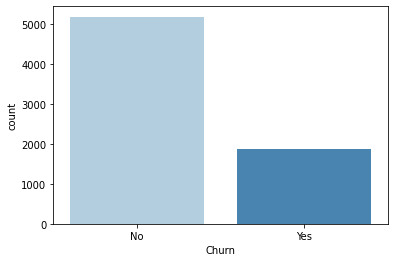

In [47]:
print(df.Churn.value_counts(normalize=True))
sns.countplot(x=df.Churn, palette="Blues")

26.5% of the customer in this dataset churned the company

### Account information

#### Category features

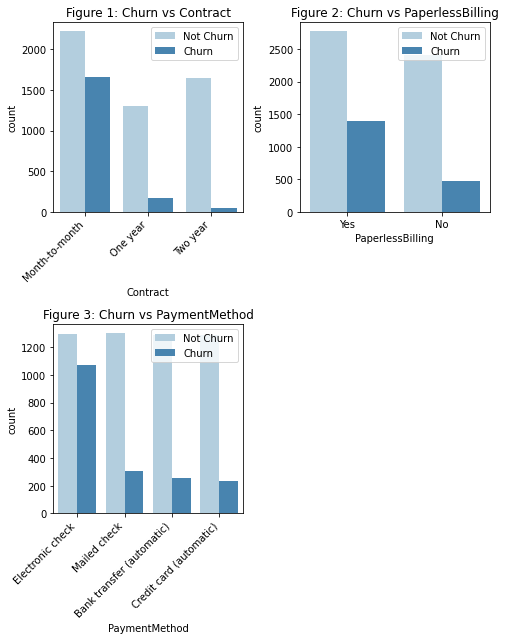

In [48]:
cat_acc_features = ['Contract','PaperlessBilling','PaymentMethod'] #category features
num_acc_features = ['tenure','MonthlyCharges','TotalCharges'] #numerical features

n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*4.5))

for r in range(n_rows):
    for c in range(n_cols):
        index = r*n_cols + c
        
        if index < len(cat_acc_features):
            
            ax_i = ax[r, c]
            sns.countplot(data=df, x=cat_acc_features[index], hue='Churn', palette="Blues", ax=ax_i)                
            ax_i.set_title(f"Figure {index+1}: Churn vs {cat_acc_features[index]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Churn', 'Churn'])
        
ax.flat[-1].set_visible(False)

ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

- One-month contract customers have high churn rate. The longer the contract, the lessly they leave the company
- Customers that use PaperlessBilling and Electronic check have high churn rate

#### Numerical feature

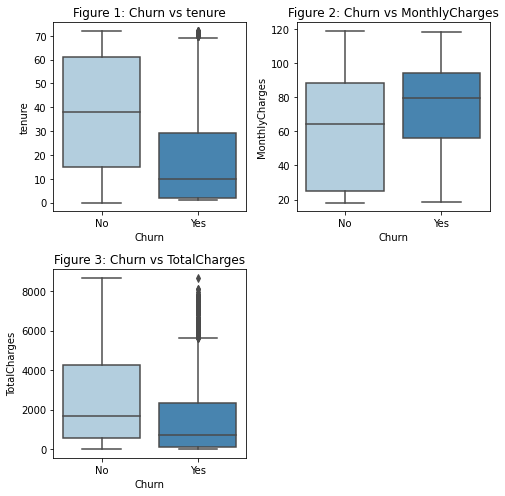

In [49]:
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(n_rows):
    for c in range(n_cols):
        index = r*n_cols + c
        if index >= len(num_acc_features): break
        ax_i = ax[r, c]
        g = sns.boxplot(data=df, x='Churn', y=num_acc_features[index], palette="Blues", ax=ax_i)
        
        ax_i.set_title(f"Figure {index+1}: Churn vs {num_acc_features[index]}")

ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

Tenure could be a good feature as 2 boxes have a non-overlap IQR range

##### Tenure

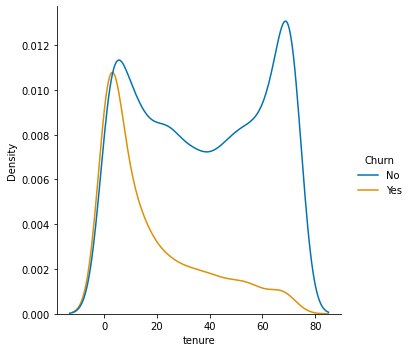

<Figure size 720x576 with 0 Axes>

In [50]:
sns.displot(x=df.tenure, hue=df.Churn, palette='colorblind', kind='kde')
plt.figure(figsize=(10,8))
plt.show()

- New customers are prone to leave the brand.
So Tenure is a good classifier

We can also see a strong corelation between "Tenure" and "TotalCharges/MonthlyCharges"

In [51]:
df_ = pd.DataFrame()
df_['Avg Paid Month']= df.TotalCharges / df.MonthlyCharges
df_['tenure'] = df.tenure
print('Corelation maxtrix')
print(df_[['Avg Paid Month', 'tenure']].corr())
del df_

Corelation maxtrix
                Avg Paid Month    tenure
Avg Paid Month        1.000000  0.998934
tenure                0.998934  1.000000


So that in some model (like Regression) we can drop TotalCharges to simplify it

##### MonthlyCharges

In [52]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

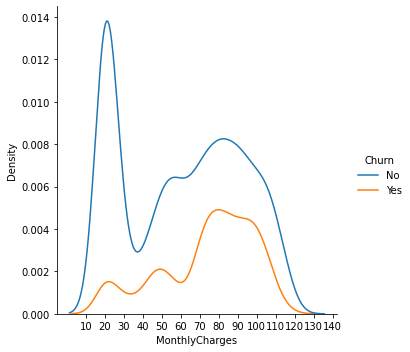

In [53]:
sns.displot(data=df, x='MonthlyCharges', hue='Churn', kind='kde')
plt.xticks(np.linspace(10,140,14))
plt.show()

- Customers with MonthlyCharges in range(70,110) are high churn
- Customers pay around 20-30 are low churn

### Demographic Information

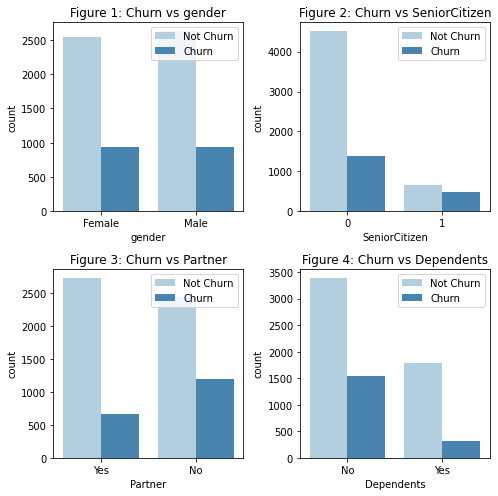

In [54]:
demo_features = ['gender','SeniorCitizen','Partner','Dependents']

n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(n_rows):
    for c in range(n_cols):
        index = r*n_cols + c
        if index < len(demo_features):
            ax_i = ax[r, c]
            sns.countplot(data=df, x=demo_features[index], hue='Churn', palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {index+1}: Churn vs {demo_features[index]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Churn', 'Churn'])
plt.tight_layout()
plt.show()

- Gender is not a good feature to predict
- Senior Citizen has a high churn rate, maybe their health condition could affected that
- If customers have Partner or Dependents, they are less likely to leave.

In [55]:
print("Average tunure of customers who have Partner AND Dependents: ", end="")
print("{:.2f}".format(df['tenure'].loc[(df.Partner == 'Yes') & (df.Dependents == 'Yes')].mean()))

print("Average tunure of customers who do not have Partner OR Dependents: ", end="")
print("{:.2f}".format(df['tenure'].loc[(df.Partner == 'No') | (df.Dependents == 'No')].mean()))

Average tunure of customers who have Partner AND Dependents: 41.36
Average tunure of customers who do not have Partner OR Dependents: 29.40


### Service information

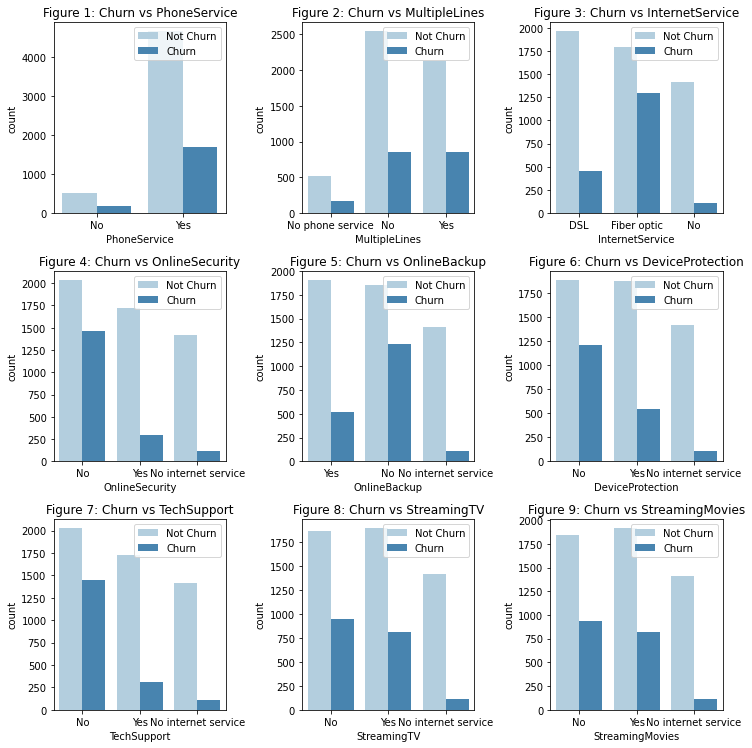

In [56]:
service_feature = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', \
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

n_rows = 3
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(n_rows):
    for c in range(n_cols):
        index = r*n_cols + c
        if index < len(service_feature):
            ax_i = ax[r, c]
            g = sns.countplot(data=df, x=service_feature[index], hue='Churn', palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {index+1}: Churn vs {service_feature[index]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Churn', 'Churn'])

plt.tight_layout()
plt.show()

- PhoneService, MultipleLines, StreamingTV, Streaming Movies: are not good classifier. Churn rates between customers who use and not use that services are quite similar
- Customers with Fiber optic Internet service have high churn. Maybe this service did not perform well and customers did not sastify
- Customers who use OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport are low churn. Let's see how many customers that use all these services

In [57]:
allservice = df.loc[(df.OnlineSecurity == 'Yes') & (df.OnlineBackup == 'Yes') & (df.DeviceProtection == 'Yes') & (df.TechSupport == 'Yes')]
as_percent = 100*allservice.Churn.count()/df.Churn.count()
as_churnrate = 100*(allservice['Churn']=='Yes').sum()/allservice.Churn.count()
as_percent_charge = 100*allservice.TotalCharges.sum() / df.TotalCharges.sum()

print('There are {:.2f} % of customers that use all OnlineSecurity, OnlineBackup, DeviceProtection, \
TechSupport service, with churn rate = {:.2f} %. They make {:.2f} % of company revenue (within this dataset)'\
    .format(as_percent, as_churnrate, as_percent_charge))

There are 6.67 % of customers that use all OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport service, with churn rate = 5.32 %. They make 16.59 % of company revenue (within this dataset)


These customers are so familiar with company ecosystem, so maybe they're not easy to leave the company. They are just 6.67% of the customers but contribute a hugh amount of revenue

<hr>

<a id="label_encoder"></a>
## Label Encoding and Train test split


We use One-Hot Encoding to label category features

In [58]:
X = pd.get_dummies(df.drop(['customerID', 'Churn'], axis=1))
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


Now we can fill the target variable and Encode it


In [59]:
y = df['Churn'].replace('Yes', 1).replace('No', 0).astype(int).to_numpy().transpose()
y.shape

(7043,)

<div id="train_test_split">
    We will be using <b>train/test split</b> on our <b>machine learning model</b>.
</div>


In [60]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of y training set {}'.format(y_testset.shape))

Shape of X training set (1409, 45) &  Size of y training set (1409,)


<hr>

<a id="modeling"></a>
## Modeling


<a id='decision_tree'></a>
### Decision Tree Classifier

In [61]:
depths = list(range(2,10))

f1_score = []

for i in depths:
    DTC = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    yhat_tree = DTC.fit(X_trainset,y_trainset).predict(X_testset)
    f1_score.append(metrics.f1_score(y_testset, yhat_tree))

best_max_depth = depths[f1_score.index(max(f1_score))]
print("DecisionTree max F1 score is: {} with max_depth = {}".format(max(f1_score), best_max_depth))

DecisionTree max F1 score is: 0.6221009549795362 with max_depth = 5


In [62]:
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth)
yhat_tree = DTC.fit(X_trainset,y_trainset).predict(X_testset)

Let's create a function to plot confussion matrix

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Accuracy: 0.80
Precision: 0.62
Recall: 0.63
F1-score: 0.62

Confusion matrix, without normalization
[[228 135]
 [142 904]]


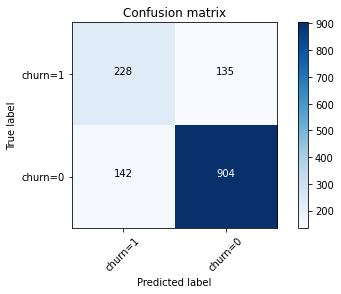

In [64]:
def model_evaluate(y_testset, y_hat):

    print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_testset, y_hat)))
    print("Precision: {:.2f}".format(metrics.precision_score(y_testset, y_hat)))
    print("Recall: {:.2f}".format(metrics.recall_score(y_testset, y_hat)))
    print("F1-score: {:.2f}".format(metrics.f1_score(y_testset, y_hat)), end="\n\n")

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_testset, y_hat, labels=[1,0])
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
    
model_evaluate(y_testset, yhat_tree)

This Decision Tree model has accuracy score = 0.8. It could predict customers who not churn, but it do not perform well when predict Churn customers (Churn='Yes').

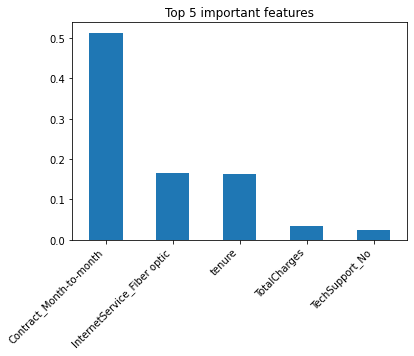

In [65]:
weights = pd.Series(DTC.feature_importances_, index=DTC.feature_names_in_)
weights.sort_values(ascending = False)[:5].plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Top 5 important features")
plt.show()

Above are top 5 important features. Base on this, we do not know that if they have positive or negative effect to the Churn. But in the EDA section, we find out that customers with Monthly contract have high churn rate

<a id='random_forest'></a>
### RandomForestClassifier

Accuracy: 0.79
Precision: 0.63
Recall: 0.47
F1-score: 0.54

Confusion matrix, without normalization
[[169 194]
 [ 99 947]]


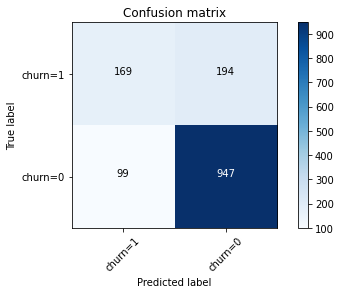

In [66]:
RFC = RandomForestClassifier()

RFC.fit(X_trainset, np.asarray(y_trainset))
yhat_RF = RFC.predict(X_testset)

model_evaluate(y_testset, yhat_RF)

Random Forest Classifier has a close accuracy score to Decision Tree. But F1 score is not that good

<a id='logistic'></a>
### Logistic Regression

To perform LogisticRegression, we need to scale numeric features

In [67]:
scaler = StandardScaler()
scale_feature = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_log = X.copy()
X_log[scale_feature] = scaler.fit_transform(X[scale_feature])
X_log[1:3]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0,0.066327,-0.259629,-0.172165,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.958066,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=3)

Accuracy: 0.81
Precision: 0.68
Recall: 0.52
F1-score: 0.59

Confusion matrix, without normalization
[[187 176]
 [ 88 958]]


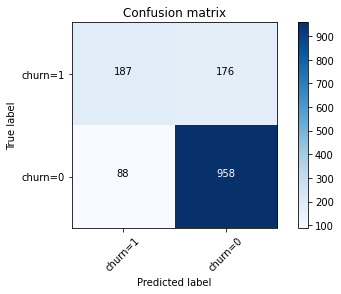

In [70]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_log = LR.predict(X_test)

model_evaluate(y_test, yhat_log)

Logistic Regression has a bit higher accuracy score, but F1-score is lower than Decision Tree

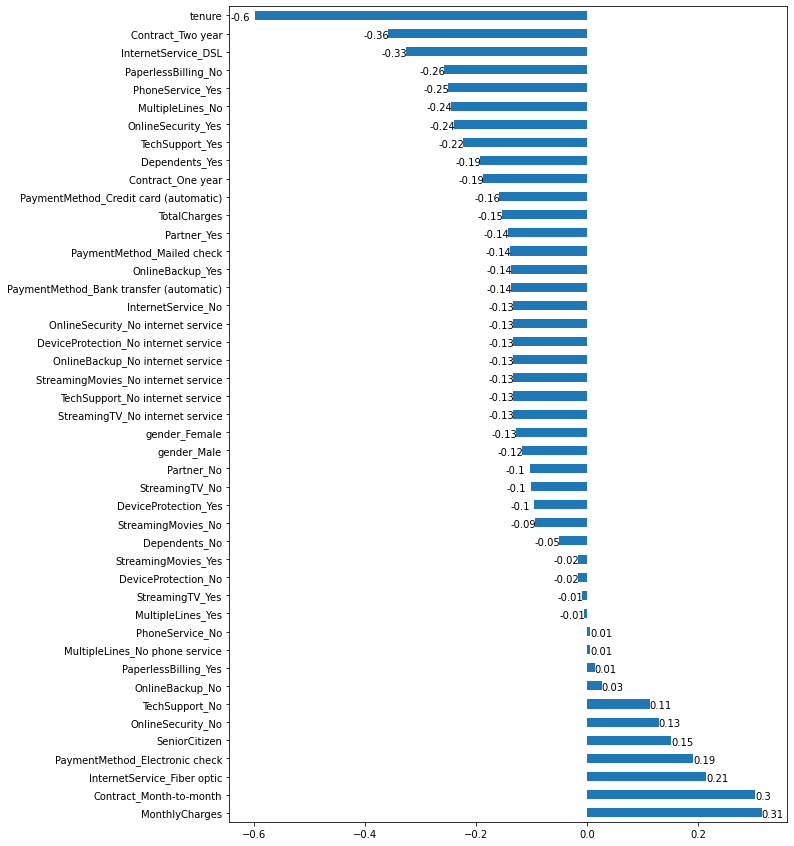

In [71]:
weights = pd.Series(LR.coef_[0], index=X_log.columns.values).sort_values(ascending = False)
plt.figure(figsize=(10, 15))
weights.plot(kind='barh')

for i, v in enumerate(weights.to_numpy()):
    if v < 0: plt.text(v-0.044, i-0.25, str(round(v,2)))
    else: plt.text(v, i-0.25, str(round(v,2)))

plt.show()

- tenure show a strong negative relationship with churn. That means, the longer customers stay with the company, the less they will churn
- Contract 2 year also show a negative score AND month-to-month show a positive. So that we should encourage customers to sign a long-term contract
- With internet service, fiber-optic service might not well. Company should investigate more about this, was the infrastructre good? Connection speed, delay,... And survey customers's experience about this service

We can also see that regression works best with continuous data, like a range of data that all continuos features that we in EDA section show a significant impact to model. While decision tree work better with category features. It is the different between algorithms the models used to fit and to predict data

## Conclusion

In this project we used 3 Classifier model. All of them can predict the churn/not churn labels with around 80% accuracy overall. Although, 3 models was bad at predicting churn customer, as the F1 score is pretty low

What we might do:
- Filter churn and not churn customers, and try to draw a portrait of them base on there features
- Try another dataset. This dataset was cleaned, and it removed many other fields that may be valuable


## Author

Truong Hong Thai
